#**Project - 16 : Intelligent Document Automation Building a Smart OCR Bot**



---



---



##***Our Approach***

  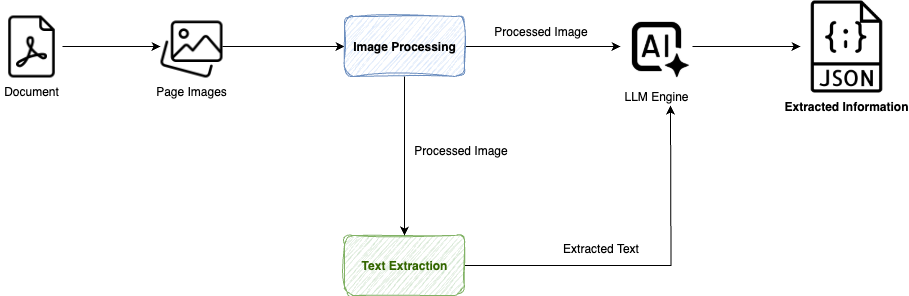



---



---



# **Resume Dataset**



---



##**Getting the data**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snehaanbhawal/resume-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'resume-dataset' dataset.
Path to dataset files: /kaggle/input/resume-dataset




---



---



##**Converting PDF TO IMAGES**

In [ ]:
!pip install PyMuPDF

In [ ]:
! pip install opencv-python matplotlib numpy

In [ ]:
import os

# List files in the dataset directory
for root, _, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

/kaggle/input/resume-dataset/Resume/Resume.csv
/kaggle/input/resume-dataset/data/data/DESIGNER/22506245.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/13998435.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/67582956.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/34349255.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/26790545.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/12674307.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/11807040.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/44145704.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/27497542.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/11155153.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/17555081.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/41506705.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/54201930.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/24583187.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/38565119.pdf
/kaggle/input/resume-dataset/data/data



---



---



#**Converting only the 1st page of the PDF to Image**

In [ ]:
import fitz  # PyMuPDF
import os

def pdf_to_images(pdf_path):
  """
  Converts the first page of a PDF file to a PNG image.

  Args:
    pdf_path: The path to the PDF file.
  """
  try:
    pdf_document = fitz.open(pdf_path)
    # Create a directory for images if it doesn't exist
    output_dir = os.path.splitext(os.path.basename(pdf_path))[0] + "_images"
    os.makedirs(output_dir, exist_ok=True)

    # Convert only the first page
    if pdf_document.page_count > 0:
        page = pdf_document.load_page(0)  # Load the first page (page number 0)
        pix = page.get_pixmap()  # Render page to an image (pixmap)
        image_filename = os.path.join(output_dir, f"page_1.png") # Name the file consistently
        pix.save(image_filename)  # Save the pixmap as a PNG image
        print(f"Saved {image_filename}")
    else:
        print(f"No pages found in {pdf_path}")
    pdf_document.close()
  except Exception as e:
    print(f"An error occurred with {pdf_path}: {e}")

# Iterate through all PDF files in the dataset and convert the first page to an image
for root, _, files in os.walk(path):
    for file in files:
        if file.endswith(".pdf"):
            pdf_path = os.path.join(root, file)
            pdf_to_images(pdf_path)

Saved 22506245_images/page_1.png
Saved 13998435_images/page_1.png
Saved 67582956_images/page_1.png
Saved 34349255_images/page_1.png
Saved 26790545_images/page_1.png
Saved 12674307_images/page_1.png
Saved 11807040_images/page_1.png
Saved 44145704_images/page_1.png
Saved 27497542_images/page_1.png
Saved 11155153_images/page_1.png
Saved 17555081_images/page_1.png
Saved 41506705_images/page_1.png
Saved 54201930_images/page_1.png
Saved 24583187_images/page_1.png
Saved 38565119_images/page_1.png
Saved 90066849_images/page_1.png
Saved 51681660_images/page_1.png
Saved 34657584_images/page_1.png
Saved 85101052_images/page_1.png
Saved 38744475_images/page_1.png
Saved 37695494_images/page_1.png
Saved 24655918_images/page_1.png
Saved 39776400_images/page_1.png
Saved 26942552_images/page_1.png
Saved 26503829_images/page_1.png
Saved 10748989_images/page_1.png
Saved 78149576_images/page_1.png
Saved 26496059_images/page_1.png
Saved 18198627_images/page_1.png
Saved 76010167_images/page_1.png
Saved 4418



---



---



#**Image Preprocesing: OpenCV**

##**Loading and Displaying 12 Images**

Found image directories: ['33964275_images', '26530575_images', '82118447_images', '23841877_images', '54934269_images', '12826414_images', '13215696_images', '28933005_images', '32308556_images', '17576030_images', '87520378_images', '12814706_images', '61677751_images', '13909762_images', '11270462_images', '19786924_images', '24455357_images', '31948488_images', '37360517_images', '28383893_images', '25413261_images', '21853199_images', '29014805_images', '18297650_images', '12890045_images', '91478356_images', '11624880_images', '17694572_images', '24677466_images', '11759079_images', '11813872_images', '16248476_images', '46349752_images', '76010167_images', '11797122_images', '93002334_images', '15313140_images', '16186411_images', '62312955_images', '18369400_images', '49685006_images', '17539842_images', '16500168_images', '32517106_images', '24068423_images', '55953734_images', '17152392_images', '39295103_images', '22861181_images', '46258701_images', '10504237_images', '1441

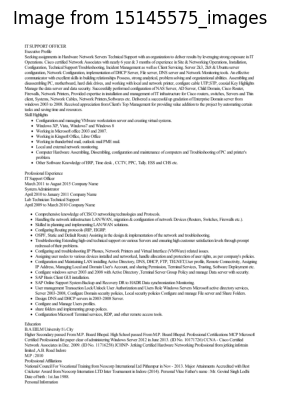

Displaying image: 14107571_images/page_1.png


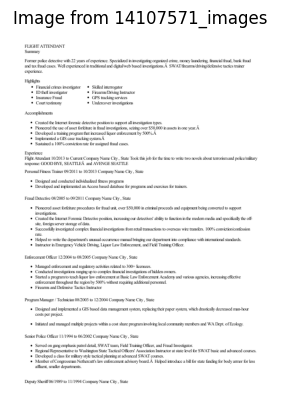

Displaying image: 20626794_images/page_1.png


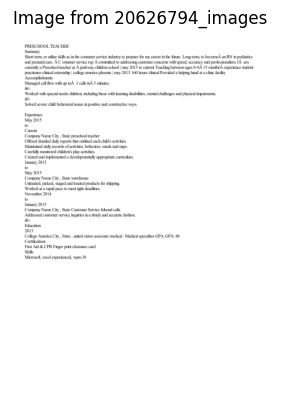

Displaying image: 11160414_images/page_1.png


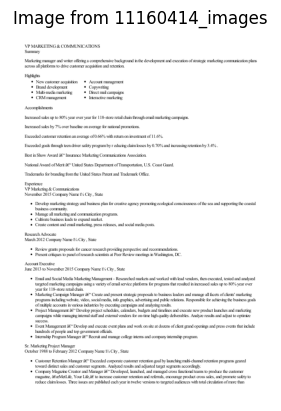

Displaying image: 11378657_images/page_1.png


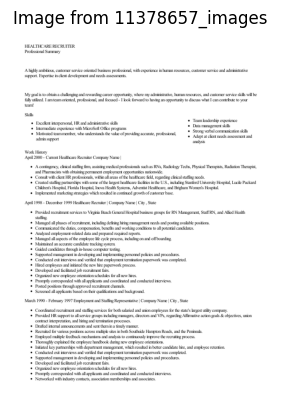

Displaying image: 13837784_images/page_1.png


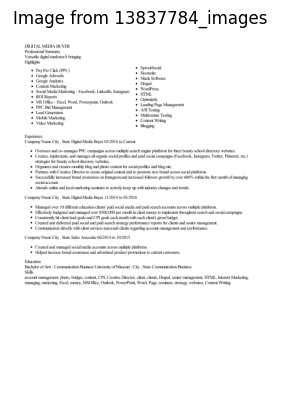

Displaying image: 18001081_images/page_1.png


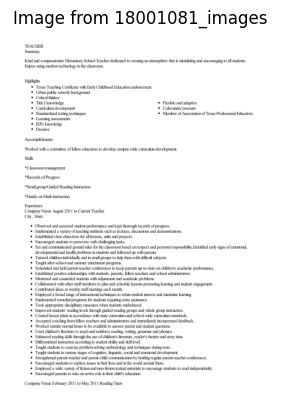

Displaying image: 19975121_images/page_1.png


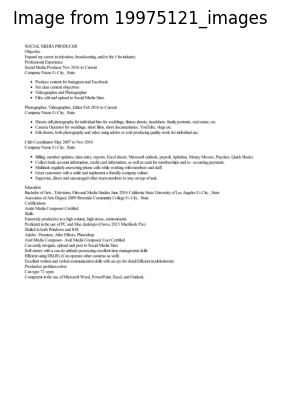

Displaying image: 16203589_images/page_1.png


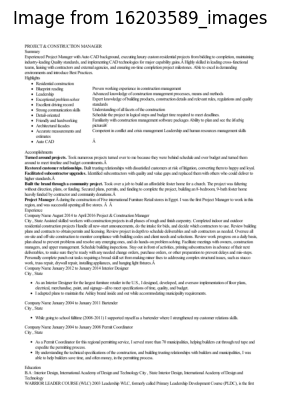

Displaying image: 19911786_images/page_1.png


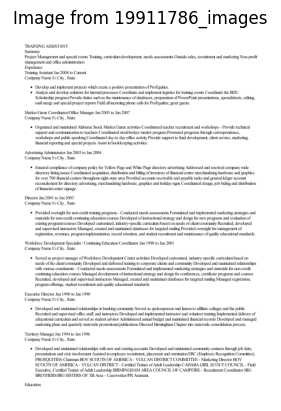

Displaying image: 11722421_images/page_1.png


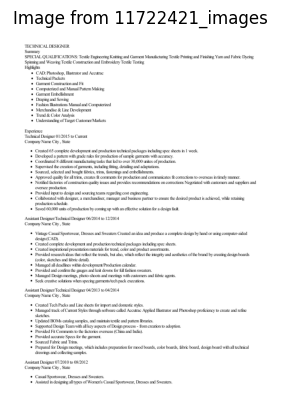

Displaying image: 15297298_images/page_1.png


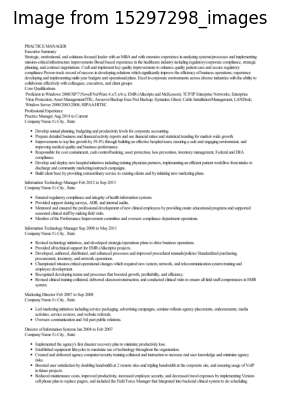

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# Find the directories created for the images
image_dirs = [d for d in os.listdir('.') if os.path.isdir(d) and '_images' in d]

if image_dirs:
    print(f"Found image directories: {image_dirs}")

    # Filter directories based on the numerical part of the name
    filtered_dirs = []
    for d in image_dirs:
        try:
            # Extract the numerical part before '_images'
            num_part_str = d.replace('_images', '')
            num_part = int(num_part_str)
            if 10001727 <= num_part <= 22259475:
                filtered_dirs.append(d)
        except ValueError:
            # Ignore directories that don't start with a number
            pass

    if filtered_dirs:
        # Select up to 12 random directories from the filtered list
        num_to_display = min(12, len(filtered_dirs))
        selected_dirs = random.sample(filtered_dirs, num_to_display)

        print(f"Displaying images from {num_to_display} selected directories:")

        # Display one image from each selected directory
        for image_dir in selected_dirs:
            images_in_dir = [f for f in os.listdir(image_dir) if f.endswith('.png')]
            if images_in_dir:
                # Display the first image found in the directory
                img_path = os.path.join(image_dir, images_in_dir[0])
                print(f"Displaying image: {img_path}")
                img = mpimg.imread(img_path)
                plt.imshow(img)
                plt.title(f"Image from {image_dir}")
                plt.axis('off') # Hide axes
                plt.show()
            else:
                print(f"No PNG images found in {image_dir}")
    else:
        print("No image directories found within the specified range.")
else:
    print("No image directories found.")



---



---



# **Grayscale Conversion**
#### ***Why?** Color information is usually not necessary for reading the text on a receipt. Converting the image to grayscale simplifies it from three color channels (Red, Green, Blue) to a single channel (intensity/brightness). This reduces computational complexity and is a required first step for many subsequent operations like thresholding.*

In [ ]:
# Convert the image to grayscale
def convert_to_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Loading image: 33964275_images/page_1.png


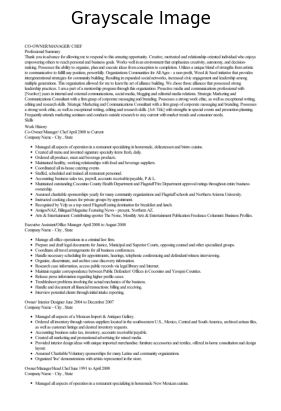

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Simple function to display an image
def display_image(image, title="Image"):
    plt.imshow(image, cmap='gray') # Use gray colormap for grayscale images
    plt.title(title)
    plt.axis('off')
    plt.show()

# Find one of the generated image files
image_file_to_load = None
image_dirs = [d for d in os.listdir('.') if os.path.isdir(d) and '_images' in d]

if image_dirs:
    # Take the first image from the first found directory
    first_image_dir = image_dirs[0]
    images_in_dir = [f for f in os.listdir(first_image_dir) if f.endswith('.png')]
    if images_in_dir:
        image_file_to_load = os.path.join(first_image_dir, images_in_dir[0])

if image_file_to_load:
    print(f"Loading image: {image_file_to_load}")
    # Load the image
    # Use cv2.imread to load image for cv2.cvtColor
    one_image = cv2.imread(image_file_to_load)

    # Convert the image to grayscale
    grayscale_image = convert_to_grayscale(one_image)
    display_image(grayscale_image, "Grayscale Image")
else:
    print("No image files found to process.")



---



---



# **Noise (blur) Reduction**

***Why?** Scanned images or photos often contain "noise" (random variations in brightness or color). This can look like small specks or graininess, which can confuse OCR algorithms. Applying a slight blur helps to smooth out this noise. A **Gaussian blur** is a common choice as it effectively averages out pixel values with a weighted average, preserving edges better than a simple blur.*

In [ ]:
def reduce_noise(gray_image):
  return cv2.GaussianBlur(gray_image, (5, 5), 0)

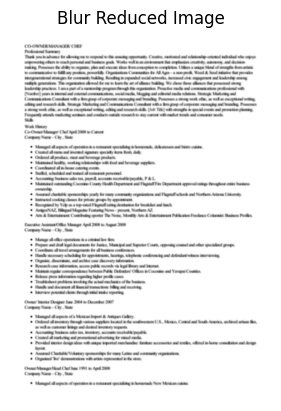

In [ ]:
blur_reduced_image = reduce_noise(grayscale_image)
display_image(blur_reduced_image, "Blur Reduced Image")



---



---



#B**inarization (Thresholding)**

#####***Why?** This is one of the most critical steps. Binarization converts the grayscale image into a pure black-and-white image. The goal is to make the text **black** and the background **white**. However, receipts often have uneven lighting or shadows, so a simple (global) threshold won't work well. We use **adaptive thresholding**, which calculates a different threshold for smaller regions of the image, making it robust to lighting changes.*

In [ ]:
def binarize_image(blur_reduced_image):
  return cv2.adaptiveThreshold(
    blur_reduced_image,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, # Invert the colors (text becomes white)
    11, # Block size
    4  # Constant C
  )

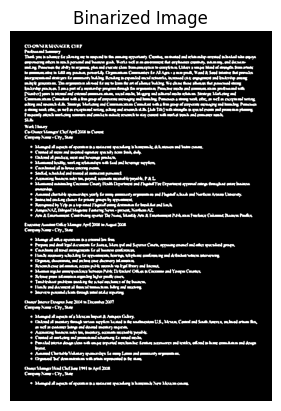

In [ ]:
binarized_image = binarize_image(blur_reduced_image)
display_image(binarized_image, "Binarized Image")



---



---



#**Skew Correction**
- ***Why?** Receipts are often scanned or photographed at a slight angle. This skew can significantly reduce the accuracy of OCR. We need to detect this angle and rotate the image to make the text perfectly horizontal.*

- *A common technique is to find the angle of the minimum-area bounding box that encloses all the text (the white pixels in our binarized image) and then rotate the original image by that angle.*

In [ ]:
def deskew_image(image):
    """
    Corrects the skew of an image by finding the minimum area rectangle
    of the text block and rotating accordingly.
    """
    # Find all non-zero (white) pixels
    coords = cv2.findNonZero(image)

    # Get the minimum area bounding rectangle
    # It returns (center(x,y), (width, height), angle of rotation)
    rect = cv2.minAreaRect(coords)
    angle = rect[-1] - 90

    # The `cv2.minAreaRect` angle has a specific range.
    # We need to adjust it for our rotation.
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = angle

    # Get the rotation matrix and rotate the image
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h),
                             flags=cv2.INTER_CUBIC,
                             borderMode=cv2.BORDER_REPLICATE)
    print(f"Detected skew angle: {angle:.2f} degrees")

    # Now, rotate the original grayscale image by the same angle
    (h, w) = rotated.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    deskewed_gray = cv2.warpAffine(rotated, M, (w, h),
                                  flags=cv2.INTER_CUBIC,
                                  borderMode=cv2.BORDER_REPLICATE)

    return deskewed_gray

In [ ]:
deskewed_image = deskew_image(binarized_image)

Detected skew angle: -0.00 degrees


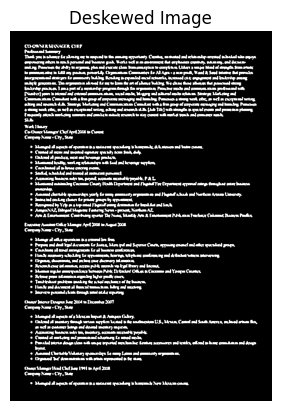

In [ ]:
display_image(deskewed_image, "Deskewed Image")



---



---



#***Let's run the above code for all images***

In [ ]:
def process_one_image(image):
  image = convert_to_grayscale(image)
  print("Converted image to grayscale..")
  image = reduce_noise(image)
  print("Reduced noise in the image..")
  image = binarize_image(image)
  print("Binarized the image..")
  image = deskew_image(image)
  print("Corrected image orientation..")
  return image

In [ ]:
import time
import fitz # Import PyMuPDF
import numpy as np # Import numpy for image conversion
import cv2 # Import cv2 for image processing

output_folder_path = "/content/processed_images"
start_time = time.time()

# Create the output folder if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)
print(f"Created folder: {output_folder_path}")

# Iterate through the data directories to find PDF files
pdf_files_to_process = []
for root, _, files in os.walk(os.path.join(path, 'data', 'data')):
    for file in files:
        if file.endswith(".pdf"):
            pdf_files_to_process.append(os.path.join(root, file))

# Process the first 20 PDF files found
for pdf_path in pdf_files_to_process[:20]:
  print(f"Processing PDF: {os.path.basename(pdf_path)}")
  try:
      pdf_document = fitz.open(pdf_path)
      if pdf_document.page_count > 0:
          page = pdf_document.load_page(0) # Load the first page
          pix = page.get_pixmap() # Get a pixmap of the page

          # Convert the pixmap to a numpy array that OpenCV can use
          # Ensure the image is in BGR format if it has color channels, otherwise just grayscale
          if pix.alpha: # Check if there's an alpha channel
              img_array = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.h, pix.w, 4)
              # Convert from RGBA to BGR (OpenCV's default color order)
              image = cv2.cvtColor(img_array, cv2.COLOR_RGBA2BGR)
          elif pix.n == 1: # Grayscale image
               image = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.h, pix.w)
          else: # Color image (RGB)
              img_array = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.h, pix.w, pix.n)
              # Convert from RGB to BGR
              image = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)


          processed_image = process_one_image(image)

          # save image
          output_path = os.path.join(output_folder_path, os.path.basename(pdf_path).replace('.pdf', '.png'))
          cv2.imwrite(output_path, processed_image)
          print(f"Saved processed image to: {output_path}")
      else:
          print(f"No pages found in {pdf_path}")
      pdf_document.close()
  except Exception as e:
      print(f"An error occurred with {pdf_path}: {e}")

  print("-"*50)

print("Processing images is completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Created folder: /content/processed_images
Processing PDF: 22506245.pdf
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: -0.00 degrees
Corrected image orientation..
Saved processed image to: /content/processed_images/22506245.png
--------------------------------------------------
Processing PDF: 13998435.pdf
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: -0.00 degrees
Corrected image orientation..
Saved processed image to: /content/processed_images/13998435.png
--------------------------------------------------
Processing PDF: 67582956.pdf
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: 0.00 degrees
Corrected image orientation..
Saved processed image to: /content/processed_images/67582956.png
--------------------------------------------------
Processing PDF: 34349255.pdf
Converted image to grayscale..
Reduced noise in the im



---



---



# **Text Extraction: Tesseract**
###*Tesseract OCR is a powerful and widely-used open-source optical character recognition (OCR) engine. In simple terms, it's a software that can "read" text from images and convert it into machine-readable text. This means you can take a picture of a document, a sign, or any other object containing text, and Tesseract can extract that text so you can edit, search, or analyze it.*

##**Installation**

`pip install pytesseract pillow`

In [ ]:
pip install pytesseract pillow

In [ ]:
from PIL import Image
import pytesseract
import os

# Find one of the processed image files
processed_images_dir = "/content/processed_images"
processed_image_file = None

if os.path.exists(processed_images_dir):
    image_files = [f for f in os.listdir(processed_images_dir) if f.endswith('.png') or f.endswith('.jpg')]
    if image_files:
        # Take the first image file found in the directory
        processed_image_file = os.path.join(processed_images_dir, image_files[0])

if processed_image_file:
    print(f"Extracting text from: {processed_image_file}")
    # Perform OCR on the image
    text = pytesseract.image_to_string(Image.open(processed_image_file))
    print("Extracted Text:")
    print(text)
else:
    print(f"No image files found in {processed_images_dir} to extract text from.")

Extracting text from: /content/processed_images/51681660.png
Extracted Text:
emake itettd
—

Peau papal Grplstpm onmeturereerbrirdipionioaurel weaiettehety Jamehrreert
er a eT Try re etd
Lr cartrt Laan iperveinber peti rd itcarenl atanteett iam trderapineect ater nad
re ee Te eT ey ee et tial
Ertl Le econ le oe Ld
re

Sal
Le betty naetee dveroeh inluawetanlomrtaripa: iva aradpceead
ee Lehan bi eclvalannetincionttie te’
Ce rere rete ee rere]
re Lee ea eee nee eT Ug a]
eres

eal
CT Locale tear Tae ole Deal a Call elaine

LT aaa etal a elt alee ds ae tape Lael ee Colca aL ead

eet tee ie a rene emer Tl terete re vate’

era
a ee ER el
ee

Eee eth eh Lecter abe thatindalietatent

Cae el eee ieee etl
ee eit

a Nee a a ee ind

L suanketlay de deta tell
me ete oes

empl dant be Sin Ps rpc The Pt lc,
Pa eee mtr ican apes ny TO Oe ete reratetery
Ce eee”

 

 

erthe nat teen tar}
Seer

Fer eet treat Ue trene nate Cy eiUer Dutt Se

ere Dee tore te erie Ste Th ewen tin oe iett Te

 

Seen ete tab 

In [ ]:
from PIL import Image
import pytesseract
import time
import os # Import os

input_folder_path = "/content/processed_images"
output_folder_path = "/content/tesseract_output"
start_time = time.time()

# Create the output folder if it doesn't exist
if os.makedirs(output_folder_path, exist_ok=True):
  print(f"Created folder: {output_folder_path}")

# Get a list of image files in the input folder
image_files = [f for f in os.listdir(input_folder_path) if f.endswith('.png') or f.endswith('.jpg')]
total_images = len(image_files)
print(f"Total images in folder: {total_images}")


# Iterate through the first 20 image files in the input folder
for i, image_name in enumerate(image_files[:20], 1): # Process only the first 20 images
  print(f"Processing image {i}/{total_images}: {image_name}")
  image_path = os.path.join(input_folder_path, image_name)
  print("Extracting text from image..")
  try:
      text = pytesseract.image_to_string(Image.open(image_path))
      # Save the extracted text to a file with a .txt extension
      output_path = os.path.join(output_folder_path, image_name.replace(".png", ".txt").replace(".jpg", ".txt"))
      with open(output_path, "w") as f:
        f.write(text)

      print(f"Saved extracted text to {output_path}")
  except Exception as e:
      print(f"Error processing image {image_name}: {e}")

  print("-"*50)

print("Text Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Total images in folder: 20
Processing image 1/20: 51681660.png
Extracting text from image..
Saved extracted text to /content/tesseract_output/51681660.txt
--------------------------------------------------
Processing image 2/20: 17555081.png
Extracting text from image..
Saved extracted text to /content/tesseract_output/17555081.txt
--------------------------------------------------
Processing image 3/20: 34349255.png
Extracting text from image..
Saved extracted text to /content/tesseract_output/34349255.txt
--------------------------------------------------
Processing image 4/20: 11155153.png
Extracting text from image..
Saved extracted text to /content/tesseract_output/11155153.txt
--------------------------------------------------
Processing image 5/20: 38744475.png
Extracting text from image..
Saved extracted text to /content/tesseract_output/38744475.txt
--------------------------------------------------
Processing image 6/20: 26790545.png
Extracting text from image..
Saved extract



---



---



#**Information Extraction**

In [ ]:
prompt = """
Extract the information from the given image.
Information to be extracted: name, current organization, skills.
The image has been converted to grayscale, noise reduced, binarized, and deskewed using opencv.
Always give your response in the following format:
{
    "name": "NAME",
    "current organization": "CURRENT_ORGANIZATION",
    "skills": "SKILLS",
}
Also, the text has been extracted from the image using tesseract.
Use the extracted text as support for extracting information.
If you believe the extraction is incorrect somewhere, you may correct it yourself and provide corrected information.
Respond with the extracted information only in the specified format.
Here is the text:


"""

In [ ]:
from google import genai
from google.colab import userdata # colab only code
from PIL import Image
import json
import time

In [ ]:
genai_client = genai.Client(api_key=userdata.get('API1'))

In [ ]:
image_folder_path = "/content/processed_images"
text_folder_path = "/content/tesseract_output"
output_folder_path = "/content/json_output"

start_time = time.time()

if os.makedirs(output_folder_path, exist_ok=True):
  print(f"Created folder: {output_folder_path}")

total_images = sum(1 for entry in os.scandir(image_folder_path))
print(f"Total images in folder: {total_images}")

for i, image_name in enumerate(os.listdir(image_folder_path)[:20], 1):
  print(f"Processing image {i}/{total_images}: {image_name}")
  image_path = os.path.join(image_folder_path, image_name)
  print(f"Loading image: {image_path}")
  with open(image_path, "rb") as f:
    image = Image.open(image_path)

  # Correctly construct the text file path by replacing the image extension with .txt
  text_file_name = image_name.replace(".png", ".txt").replace(".jpg", ".txt")
  text_path = os.path.join(text_folder_path, text_file_name)

  print(f"Loading extracted text: {text_path}")
  text = ""
  try:
      with open(text_path, "r") as f:
        text = f.read()
  except FileNotFoundError:
      print(f"Text file not found for {image_name}. Skipping text for this image.")


  print("Extracting information from image and text..")

  # Construct the prompt with the extracted text
  current_prompt = prompt + text


  contents = [
        image,
        {
            "text": current_prompt
        }
    ]
  response = genai_client.models.generate_content(model='gemini-1.5-flash', contents=contents)

  # Access the usage_metadata attribute
  usage_metadata = response.usage_metadata

  # Print the different token counts
  print(f"Input Token Count: {usage_metadata.prompt_token_count}")
  print(f"Thoughts Token Count: {response.usage_metadata.thoughts_token_count}")
  print(f"Output Token Count: {usage_metadata.candidates_token_count}")
  print(f"Total Token Count: {usage_metadata.total_token_count}")

  extracted_information = json.loads(response.text.replace('```json', '').replace('```', ''))
  output_path = os.path.join(output_folder_path, image_name.replace(".png", ".json").replace(".jpg", ".json"))
  with open(output_path, "w") as f:
    json.dump(extracted_information, f, indent=4)

  print(f"Saved extracted information to {output_path}")
  print("-"*50)
  time.sleep(60) # Add a delay to avoid hitting API rate limits

print("Information Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Total images in folder: 20
Processing image 1/20: 51681660.png
Loading image: /content/processed_images/51681660.png
Loading extracted text: /content/tesseract_output/51681660.txt
Extracting information from image and text..
Input Token Count: 807
Thoughts Token Count: None
Output Token Count: 86
Total Token Count: 893
Saved extracted information to /content/json_output/51681660.json
--------------------------------------------------
Processing image 2/20: 17555081.png
Loading image: /content/processed_images/17555081.png
Loading extracted text: /content/tesseract_output/17555081.txt
Extracting information from image and text..
Input Token Count: 915
Thoughts Token Count: None
Output Token Count: 84
Total Token Count: 999
Saved extracted information to /content/json_output/17555081.json
--------------------------------------------------
Processing image 3/20: 34349255.png
Loading image: /content/processed_images/34349255.png
Loading extracted text: /content/tesseract_output/34349255.tx



---



---



#**Displaying the Content of the JSON File**

In [ ]:
import os
import json

output_folder_path = "/content/json_output"

if os.path.exists(output_folder_path):
    json_files = [f for f in os.listdir(output_folder_path) if f.endswith('.json')]
    if json_files:
        print(f"Found JSON files in {output_folder_path}:")
        for json_file in json_files:
            print(json_file)

        # Read and display the content of all JSON files
        print("\nContent of all JSON files:")
        for json_file in json_files:
            json_file_path = os.path.join(output_folder_path, json_file)
            print(f"\n--- Content of {json_file} ---")
            with open(json_file_path, 'r') as f:
                data = json.load(f)
                print(json.dumps(data, indent=4)) # Pretty print the JSON
    else:
        print(f"No JSON files found in {output_folder_path}.")
else:
    print(f"Output directory not found: {output_folder_path}")

Found JSON files in /content/json_output:
26790545.json
67582956.json
54201930.json
38744475.json
44145704.json
34349255.json
85101052.json
90066849.json
24583187.json
41506705.json
34657584.json
17555081.json
22506245.json
11807040.json
11155153.json
27497542.json
13998435.json
38565119.json
51681660.json
12674307.json

Content of all JSON files:

--- Content of 26790545.json ---
{
    "name": "Presentation Designer",
    "current organization": "Customer care and Digital enablement Department of MTN Nigeria",
    "skills": "Adobe Photoshop (Mock ups and Prototype), Adobe Illustrator (Vector and Interactive Prototype), Adobe After Effects (Motion Graphics), Adobe Dreamweaver, Adobe Animate, Adobe Premiere, Adobe Audition, HTML and CSS (Coding and website), ASP.NET, Wordpress and Drupal, Javascript, ITML, CSS, jQuery, ActionScript 3.0, Powerpoint and Keynote"
}

--- Content of 67582956.json ---
{
    "name": null,
    "current organization": null,
    "skills": "Team Player,\nOrganized



---



---



#**Comparing the extracted JSON file and the Image**

--- Displaying Image 1 and JSON Output ---
Displaying image: 51681660.png


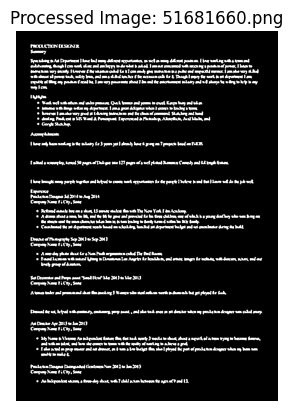

JSON output for 51681660.png:
{
    "name": null,
    "current organization": null,
    "skills": [
        "Work well in collaborations and under pressure",
        "Quick learner and problem solver",
        "Keep calm and think clearly under pressure",
        "Have a strong sense of responsibility and dedication",
        "Always try my best to meet deadlines"
    ]
}
--------------------------------------------------
--- Displaying Image 2 and JSON Output ---
Displaying image: 17555081.png


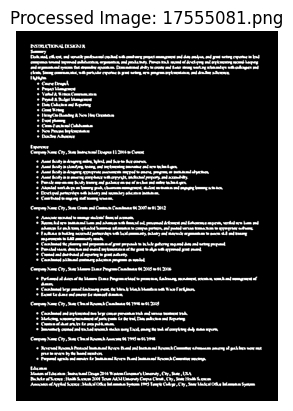

JSON output for 17555081.png:
{
    "name": "Instructional Designer",
    "current organization": "State University, Draper",
    "skills": "Course Design, Project Management, Data Analysis, Grant Writing, Program Evaluation, Curriculum Development, Needs Assessment, Marketing, Communication, Budget Management, Client Relations, New Program Development, Event Planning, Community Collaboration, New Process Implementation, Desktop Publishing"
}
--------------------------------------------------
--- Displaying Image 3 and JSON Output ---
Displaying image: 34349255.png


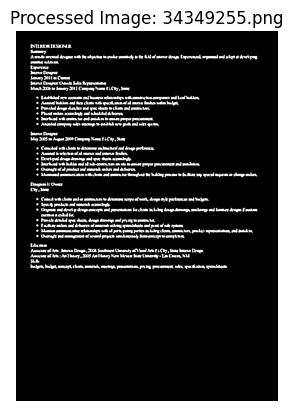

JSON output for 34349255.png:
{
    "name": "NEROUSINI",
    "current organization": "Company Name (City, State)",
    "skills": "market analysis, sales presentations, company and local market, budget, design, sketches, and business analysis of potential market, budget, product design, assembly and packaging, A to Z process and controls, technical drawing, product development and production, proper paperwork process and submission, presentations, client materials, meetings, presentations, print, pre-press, paperwork, sales, specification, problem-solving"
}
--------------------------------------------------
--- Displaying Image 4 and JSON Output ---
Displaying image: 11155153.png


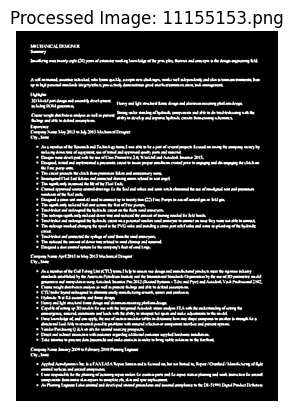

JSON output for 11155153.png:
{
    "name": "Imaad",
    "current organization": null,
    "skills": "3D modeling, plant design and safety, direct report, heavy and light structural frame design and shop drawing, executing field changes, center weight distribution analysis, self-motivated, strong ability to study and understand complex projects and able to do multitasking, ability to quickly respond and improve hydraulic circuits in time-saving solutions"
}
--------------------------------------------------
--- Displaying Image 5 and JSON Output ---
Displaying image: 38744475.png


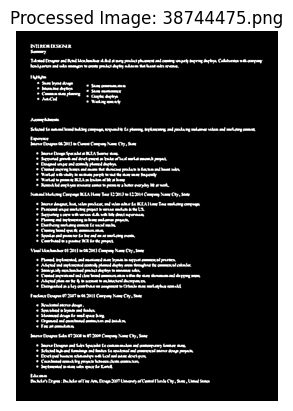

JSON output for 38744475.png:
{
    "name": "INTERIOR DESIGNER",
    "current organization": null,
    "skills": "- Space layout & Arrangement\n- Store communication\n- Interior display\n- Display design\n- Computer-aided planning\n- Store analysis\n- AutoCAD\n- Working on-site"
}
--------------------------------------------------
--- Displaying Image 6 and JSON Output ---
Displaying image: 26790545.png


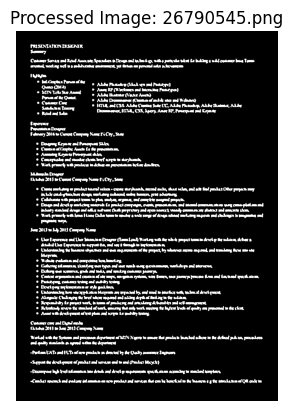

JSON output for 26790545.png:
{
    "name": "Presentation Designer",
    "current organization": "Customer care and Digital enablement Department of MTN Nigeria",
    "skills": "Adobe Photoshop (Mock ups and Prototype), Adobe Illustrator (Vector and Interactive Prototype), Adobe After Effects (Motion Graphics), Adobe Dreamweaver, Adobe Animate, Adobe Premiere, Adobe Audition, HTML and CSS (Coding and website), ASP.NET, Wordpress and Drupal, Javascript, ITML, CSS, jQuery, ActionScript 3.0, Powerpoint and Keynote"
}
--------------------------------------------------
--- Displaying Image 7 and JSON Output ---
Displaying image: 24583187.png


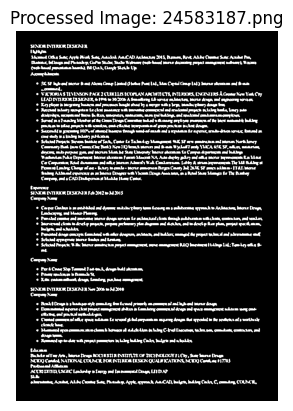

JSON output for 24583187.png:
{
    "name": "NAME",
    "current organization": null,
    "skills": "AutoCAD, Revit, Adobe Creative Suite, ArchiCAD, SketchUp, Apple, Microsoft Office, Project Management, Budget, Building Codes, Communication, COUNCIL"
}
--------------------------------------------------
--- Displaying Image 8 and JSON Output ---
Displaying image: 12674307.png


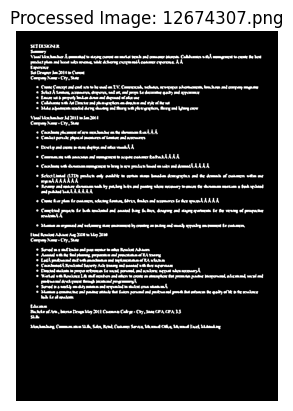

JSON output for 12674307.png:
{
    "name": "STEVEN WILSON",
    "current organization": "Set Draper",
    "skills": "Visual Merchandiser, A member of buying team, control on market trends and consumer insight, Collaboration & CRM management to supply the best product plan and lead community to achieving required market goals and customer revenue, Create a Layout and resource to be used on TV, Commercials, website, brochures, envelope, publication, banners and company magazines, Select A Concept and coordinate and approved, work out of papers to determine quality and appropriateness, Ensure that is properly done and photograph of ideas and style of the day, Collaborate with Art Director during shooting and sharing with photo system, Hiring and managing crew, Visual Merchandiser, Created photos of new products on the showroom floor, Control physical appearance of merchandise and accessories, Directly and create to many displays and window visual, Communicating with vendors and employees

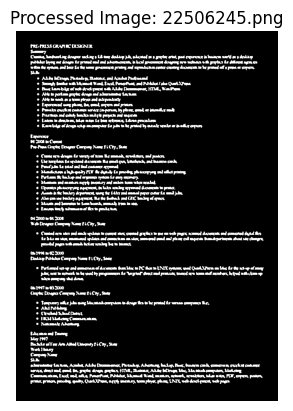

JSON output for 22506245.png:
{
    "name": null,
    "current organization": null,
    "skills": "Adobe InDesign, Photoshop, QuarkXPress, Adobe Illustrator, HTML, Word, PowerPoint, pre-press, printing, and binding of books, brochures, and posters, creating and editing PDFs, customer service, problem-solving, and project management, maintaining back-up systems for data recovery, operating phototypesetting equipment, working with different types of paper, and preparing documents for printing, using a computer to plan jobs to be printed by outside vendors or in-house, communicating effectively with clients, knowledge of design and pre-press processes, preparing mockups of designs, Adobe Dreamweaver, QuarkXPress, supply inventory, team player, phone, UNIX, web development, web pages, pre-press, printing, quality, PDF, etc."
}
--------------------------------------------------
--- Displaying Image 10 and JSON Output ---
Displaying image: 34657584.png


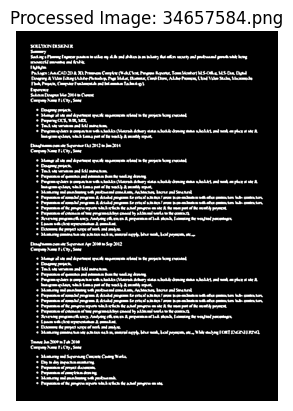

JSON output for 34657584.png:
{
    "name": "SOLUTION DESIGNER",
    "current organization": "Company Name, City, State",
    "skills": "Planning and Project Management, AutoCAD, MS Project, Primavera P6, MS Office, MS Visio, Digital Design, Web Design, Flash Animation, Page Maker, Dreamweaver, Corel Draw, Adobe Photoshop, (3D Studio, Blender, Cinema 4D)"
}
--------------------------------------------------
--- Displaying Image 11 and JSON Output ---
Displaying image: 44145704.png


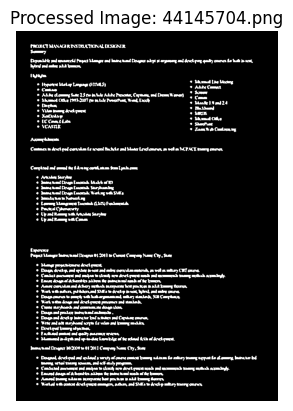

JSON output for 44145704.png:
{
    "name": null,
    "current organization": "Company Name City, State",
    "skills": "Project Management, Instructional Design, Adobe Dreamweaver, Captivate, and Presenter, Microsoft Office, Moodle, Articulate Storyline, Lectora, Camtasia, Adobe Connect, Server, Microsoft Lync Meeting, SharePoint, Zoom,  Hypertext Markup Language (HTML), XML, Video Editing, Audio Production, Instructional Design, E-Learning, Storyboarding, ADDIE, SAM, Curriculum Development, Needs Analysis, Project Management, Course Development, Course Delivery, Quality Assurance, and Military Training"
}
--------------------------------------------------
--- Displaying Image 12 and JSON Output ---
Displaying image: 54201930.png


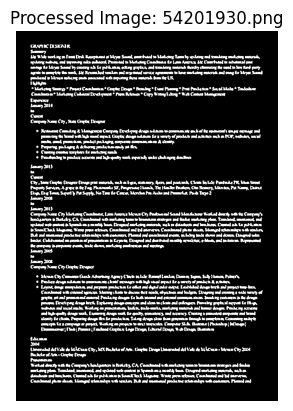

JSON output for 54201930.png:
{
    "name": "Paro?",
    "current organization": null,
    "skills": "Marketing Strategy, Project Coordination, Graphic Design, Branding, Print Design, Pre-Press, Print Production, Social Media, Troubleshooting, Marketing Collateral Development, Press Release, Copy Writing, Web Content Management, manage and lead the impact, Company\u2019s design solutions for a variety of products and for the equipment\u2019s POP, websites, social media, and packaging, achieving package compatibility on a Shelf, creating packaging mock-ups and marketing materials, Prepare and present marketing strategies, manage and lead impact company\u2019s design solutions for a variety of products and for the equipment\u2019s POP, websites, social media, and packaging, achieving package compatibility on a Shelf, creating packaging mock-ups and marketing materials, Prepare and present marketing strategies, high-quality work especially under changing deadlines, Design print work, such

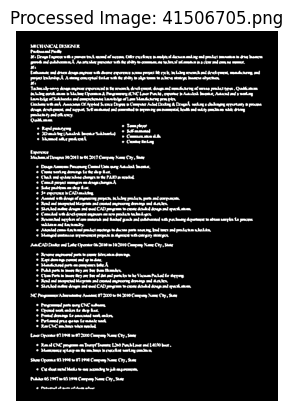

JSON output for 41506705.png:
{
    "name": null,
    "current organization": null,
    "skills": "- Rapid prototyping\n- 3D modeling (Pro/Engineer, Inventor, Solidworks)\n- Assembly and other product design\n- Team player\n- Self-motivated\n- Communication skills\n- Creating tooling"
}
--------------------------------------------------
--- Displaying Image 14 and JSON Output ---
Displaying image: 27497542.png


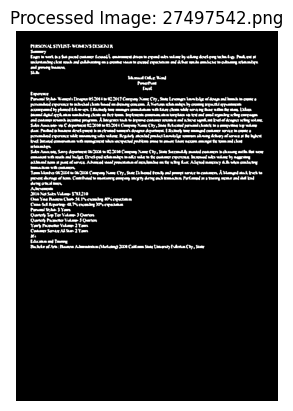

JSON output for 27497542.png:
{
    "name": null,
    "current organization": null,
    "skills": null
}
--------------------------------------------------
--- Displaying Image 15 and JSON Output ---
Displaying image: 90066849.png


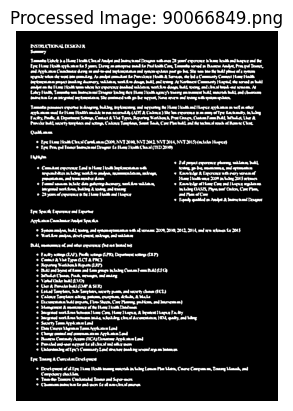

JSON output for 90066849.png:
{
    "name": "Tammy Ulrich",
    "current organization": "Eye Health Care",
    "skills": "\u2022 Full project experience planning, solution build, testing, go-live, maintenance, and operation of Eye Health & Lyngsoe 2009 and 2015 systems\n\u2022 Knowledge of Epic\u2019s baby, cry room, and access in baby DAWN, Payer, Copays, Care Plans, and Plan of Care\n\u2022 Fully qualified as an Analyst & Trainer and Designer"
}
--------------------------------------------------
--- Displaying Image 16 and JSON Output ---
Displaying image: 85101052.png


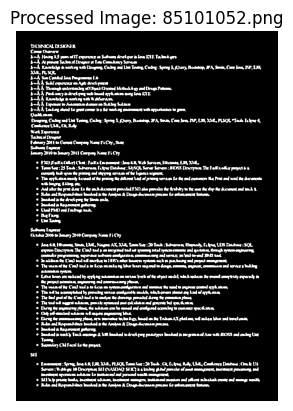

JSON output for 85101052.png:
{
    "name": "Technical Designer",
    "current organization": "Company Name, City, State",
    "skills": "- Having 8.5 years of IT experience as a Software developer for Java/J2EE Technologies\n- A Project team lead and off-shore team lead experience\n- Expertise in working with Designing, Coding and Unit Testing, Coding: Spring J2EE, PL/SQL\n- Solid experience in Agile projects\n- A Senior level Programmer\n- Thorough understanding of Object Oriented Methodology and Design Patterns\n- Track record in direct participation in building key J2EE\n- Expertise in working with Building Solutions\n- Excellent problem-solving skills\n- Leading a team for past 2 years in a very challenging environment with opportunities to grow.\nDesigning, Coding and Unit Testing, Coding: Spring J2EE, Query, Buttons, Struts, Core Java, JSP, JSF, LIB, XML, PL/SQL, Tools: Eclipse & JUnit"
}
--------------------------------------------------
--- Displaying Image 17 and JSON Output 

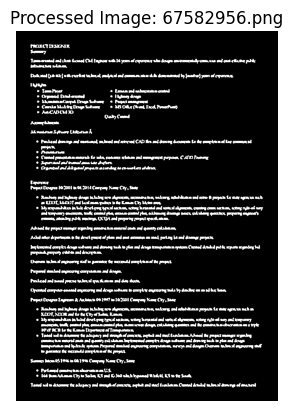

JSON output for 67582956.png:
{
    "name": null,
    "current organization": null,
    "skills": "Team Player,\nOrganized,\nProblem Solving,\nComputer-Aided Design Software,\nAutoCAD 2010,\nMS Office (Word, Excel, Powerpoint),\nQuality Control,\nProject Planning and Management,\nCAD Drafting,\nEngineering Software (List Software A),\nQuantity Surveying and Calculation"
}
--------------------------------------------------
--- Displaying Image 18 and JSON Output ---
Displaying image: 38565119.png


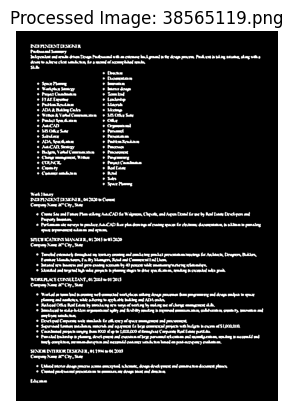

JSON output for 38565119.png:
{
    "name": "INDIVIDUALLY DESIGN",
    "current organization": "SENIOR INTERIOR DESIGN",
    "skills": "Space Planning, Workplace Strategy, Project Coordination, ITACE Expertise, ADA & Building Codes, Visual & Verbal Communication, AutoCAD, Architectural Design, Subcontractor, ADA Specs, ADA Accessibility, Change Management, Budget / Financial, Writing, COUNCIL, Quantity Surveys"
}
--------------------------------------------------
--- Displaying Image 19 and JSON Output ---
Displaying image: 11807040.png


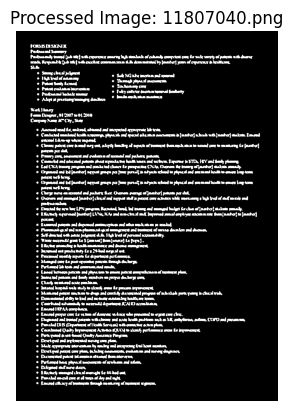

JSON output for 11807040.png:
{
    "name": null,
    "current organization": "Company Name, City, State",
    "skills": "- Sensory (auditory)\n- High level of accuracy\n- Patient and bedside manner\n- Problem-solving interventions\n- Adopt of proactive energy donation\n- Solid NG tube insertion and removal\n- Through physics and removal\n- Daily catheter care\n- Family center care\n- Handle crisis in emergency"
}
--------------------------------------------------
--- Displaying Image 20 and JSON Output ---
Displaying image: 13998435.png


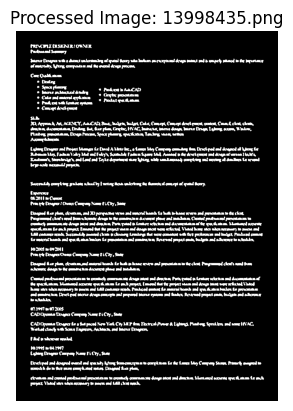

JSON output for 13998435.png:
{
    "name": "Jason Draper",
    "current organization": "Donald A. Nelson, Inc.",
    "skills": "3D, AutoCAD, Revit, budgets, CAD, Concept Development, Construction Documents, CAD & shop drawings, Flash presentations, Drawing packages, Space planning, specifications, \"Technical\" issues, design, Lighting systems, finishes, and \"Millwork\""
}
--------------------------------------------------


In [ ]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_folder_path = "/content/processed_images"
json_folder_path = "/content/json_output"

# Get a list of processed image files
image_files = [f for f in os.listdir(image_folder_path) if f.endswith('.png') or f.endswith('.jpg')]

# Iterate through the first 20 image files and display the image and its JSON output
for i, image_name in enumerate(image_files[:20], 1):
    print(f"--- Displaying Image {i} and JSON Output ---")

    # Display the image
    image_path = os.path.join(image_folder_path, image_name)
    if os.path.exists(image_path):
        print(f"Displaying image: {image_name}")
        img = mpimg.imread(image_path)
        plt.imshow(img, cmap='gray') # Use gray colormap for grayscale images
        plt.title(f"Processed Image: {image_name}")
        plt.axis('off') # Hide axes
        plt.show()
    else:
        print(f"Image file not found: {image_name}")

    # Display the corresponding JSON output
    json_file_name = image_name.replace(".png", ".json").replace(".jpg", ".json")
    json_path = os.path.join(json_folder_path, json_file_name)
    if os.path.exists(json_path):
        print(f"JSON output for {image_name}:")
        try:
            with open(json_path, 'r') as f:
                data = json.load(f)
                print(json.dumps(data, indent=4)) # Pretty print the JSON
        except json.JSONDecodeError:
            print(f"Error decoding JSON file: {json_file_name}")
        except Exception as e:
            print(f"An error occurred reading {json_file_name}: {e}")
    else:
        print(f"JSON file not found for {image_name}: {json_file_name}")

    print("-" * 50)